## Writing a fieldfile for OF from a given mesh

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
import os
from scipy.interpolate import griddata

import meshio
import re

In [194]:
path2folder='airfoil2d/airFoil_300/VTK/airFoil_300_211/'
meshfilename='internal.vtu'
folders=os.listdir(path2folder)
path2file=path2folder+meshfilename
print(path2file)

airfoil2d/airFoil_300/VTK/airFoil_300_211/internal.vtu


In [304]:
# loads the mesh and splits all relevant info into seperate variables
mesh=meshio.read(path2file)

cell_ptsid=mesh.cells_dict

#what happens if the mesh is not only hexahedron?
cell_ptsid=np.array(cell_ptsid['hexahedron'])

points = mesh.points

In [305]:
cell_pts=points[cell_ptsid[:,:]]
print(cell_pts.shape)
vertex=np.average(cell_pts,axis=1)
print(vertex.shape)

(10720, 8, 3)
(10720, 3)


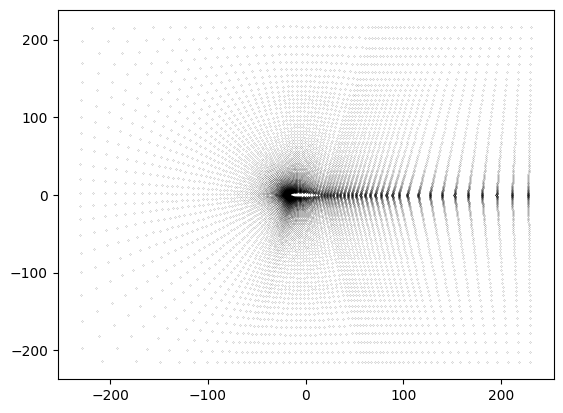

In [309]:
#plt.scatter(points[:,0],points[:,1], c=p_t, s=0.01)
#plt.scatter(cell_pts[:,:,0],cell_pts[:,:,1], c='r', s=.01)
plt.scatter(vertex[:,0],vertex[:,1], c='k', s=.01)

## Export to Openfoam

In [310]:
path2folder='airfoil2d/mesh_export_test/0.orig/'
channel='p'
folders=os.listdir(path2folder)
print(folders)

['nut', 'nuTilda', 'p', 'U']


In [311]:
with open(path2folder+channel,"r") as f:
    contents=f.readlines()

In [312]:
# finds the line where the internal field is being adressed
idx = [j for j, item in enumerate(contents) if re.search('internalField   ', item)]

Test with gradient defined by x Value of vertex

In [313]:
#iterates through the vertices and saves the corresponding values
string=''
for i in range(p_c.shape[1]):
    string = string + str(vertex[i,0]) + '\n'

In [314]:
# creates a complete list will all lines that need to be written in the field file
contents[idx[0]]='internalField   nonuniform List<scalar>'+'\n'+str(np.array(p_c).shape[1])+'\n'+'('+string+');'

In [315]:
#writes the final file
path2folder='airfoil2d/mesh_export_test/0/'
with open(path2folder+channel,"w") as f:
    f.writelines(contents)